In [6]:
import pandas as pd

In [9]:
games_database = pd.read_csv('database_m1129.csv')

In [10]:
print(games_database)

    Game ID Player Winner Result
0         0  Alice  Alice    Win
1         0    Ben  Alice   Loss
2         1  Alice    Ben   Loss
3         1    Ben    Ben    Win
4         2  Alice    Ben   Loss
5         2    Ben    Ben    Win
6         3   Kate   Kate    WIn
7         3    Ben   Kate   Loss
8         4  Alice    Ben   Loss
9         4    Ben    Ben    Win
10        5  Alice    Ben   Loss
11        5    Ben    Ben    Win
12        6  Alice  Alice    Win
13        6    Ben  Alice   Loss
14        7   Kate   Kate    Win
15        7    Ben   Kate    WIn
16        8  Alice  Alice    Win
17        8    Ben  Alice   Loss
18        9   Kate   Kate    Win
19        9    Ben   Kate   Loss


# Count the winner

<AxesSubplot:>

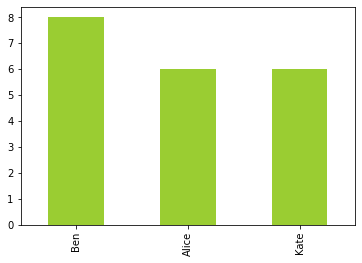

In [76]:
games_database['Winner'].value_counts().plot(kind='bar', color = 'yellowgreen')

In [12]:
#print(games_database.iloc[:, 2:])

# Count the number of appearances

<AxesSubplot:>

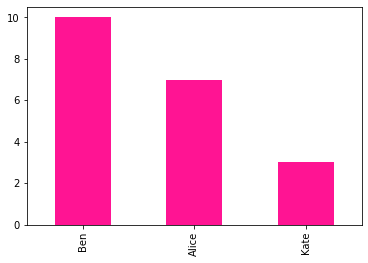

In [77]:
games_database['Player'].value_counts().plot(kind='bar', color = 'deeppink')



In [69]:
#games_database.groupby(by=['Player']).count()

,Game ID,Winner,Result
Player,,,
Alice,7,7,7
Ben,10,10,10
Kate,3,3,3


# Count the possibility to win

### Number of victories of each person / the total game counts

In [57]:
games_database

,Game ID,Player,Winner,Result
0,0,Alice,Alice,Win
1,0,Ben,Alice,Loss
2,1,Alice,Ben,Loss
3,1,Ben,Ben,Win
4,2,Alice,Ben,Loss
5,2,Ben,Ben,Win
6,3,Kate,Kate,WIn
7,3,Ben,Kate,Loss
8,4,Alice,Ben,Loss
9,4,Ben,Ben,Win


### To filter out those who won

In [58]:
winnerdf = games_database[games_database['Player'] == games_database['Winner']]

In [59]:
winnerdf

,Game ID,Player,Winner,Result
0,0,Alice,Alice,Win
3,1,Ben,Ben,Win
5,2,Ben,Ben,Win
6,3,Kate,Kate,WIn
9,4,Ben,Ben,Win
11,5,Ben,Ben,Win
12,6,Alice,Alice,Win
14,7,Kate,Kate,Win
16,8,Alice,Alice,Win
18,9,Kate,Kate,Win


### To calculate the number of game

In [60]:
winnerdf = winnerdf.groupby('Winner').count()[['Result']]

In [61]:
winnerdf

,Result
Winner,
Alice,3
Ben,4
Kate,3


In [62]:
number_of_games = len(games_database['Game ID'].unique())

In [65]:
number_of_games

10

In [63]:
winnerdf['Odds of winning'] = (winnerdf['Result']*100//number_of_games)

In [64]:
winnerdf.index

Index(['Alice', 'Ben', 'Kate'], dtype='object', name='Winner')

In [66]:
winnerdf

,Result,Odds of winning
Winner,,
Alice,3,30
Ben,4,40
Kate,3,30


In [67]:
import matplotlib.pyplot as plt

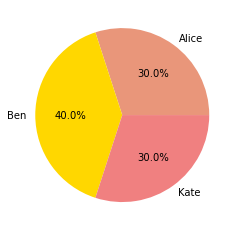

In [71]:
labels = [str(name) for name in winnerdf.index]
colors = ['darksalmon', 'gold', 'lightcoral']

plt.pie(winnerdf['Odds of winning'], colors=colors , labels= labels ,autopct='%1.1f%%')

plt.show()